In [1]:
%run config.py

In [2]:
data = pd.read_csv('Data/customer_support_tickets.csv')

In [3]:
# data.head()

data[['Ticket Type','Product Purchased','Ticket Description']].head()

,Ticket Type,Product Purchased,Ticket Description
0,Technical issue,GoPro Hero,I'm having an issue with the {product_purchase...
1,Technical issue,LG Smart TV,I'm having an issue with the {product_purchase...
2,Technical issue,Dell XPS,I'm facing a problem with my {product_purchase...
3,Billing inquiry,Microsoft Office,I'm having an issue with the {product_purchase...
4,Billing inquiry,Autodesk AutoCAD,I'm having an issue with the {product_purchase...


In [4]:
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [32]:
data = data.drop(columns=['Customer Name','Customer Email'])

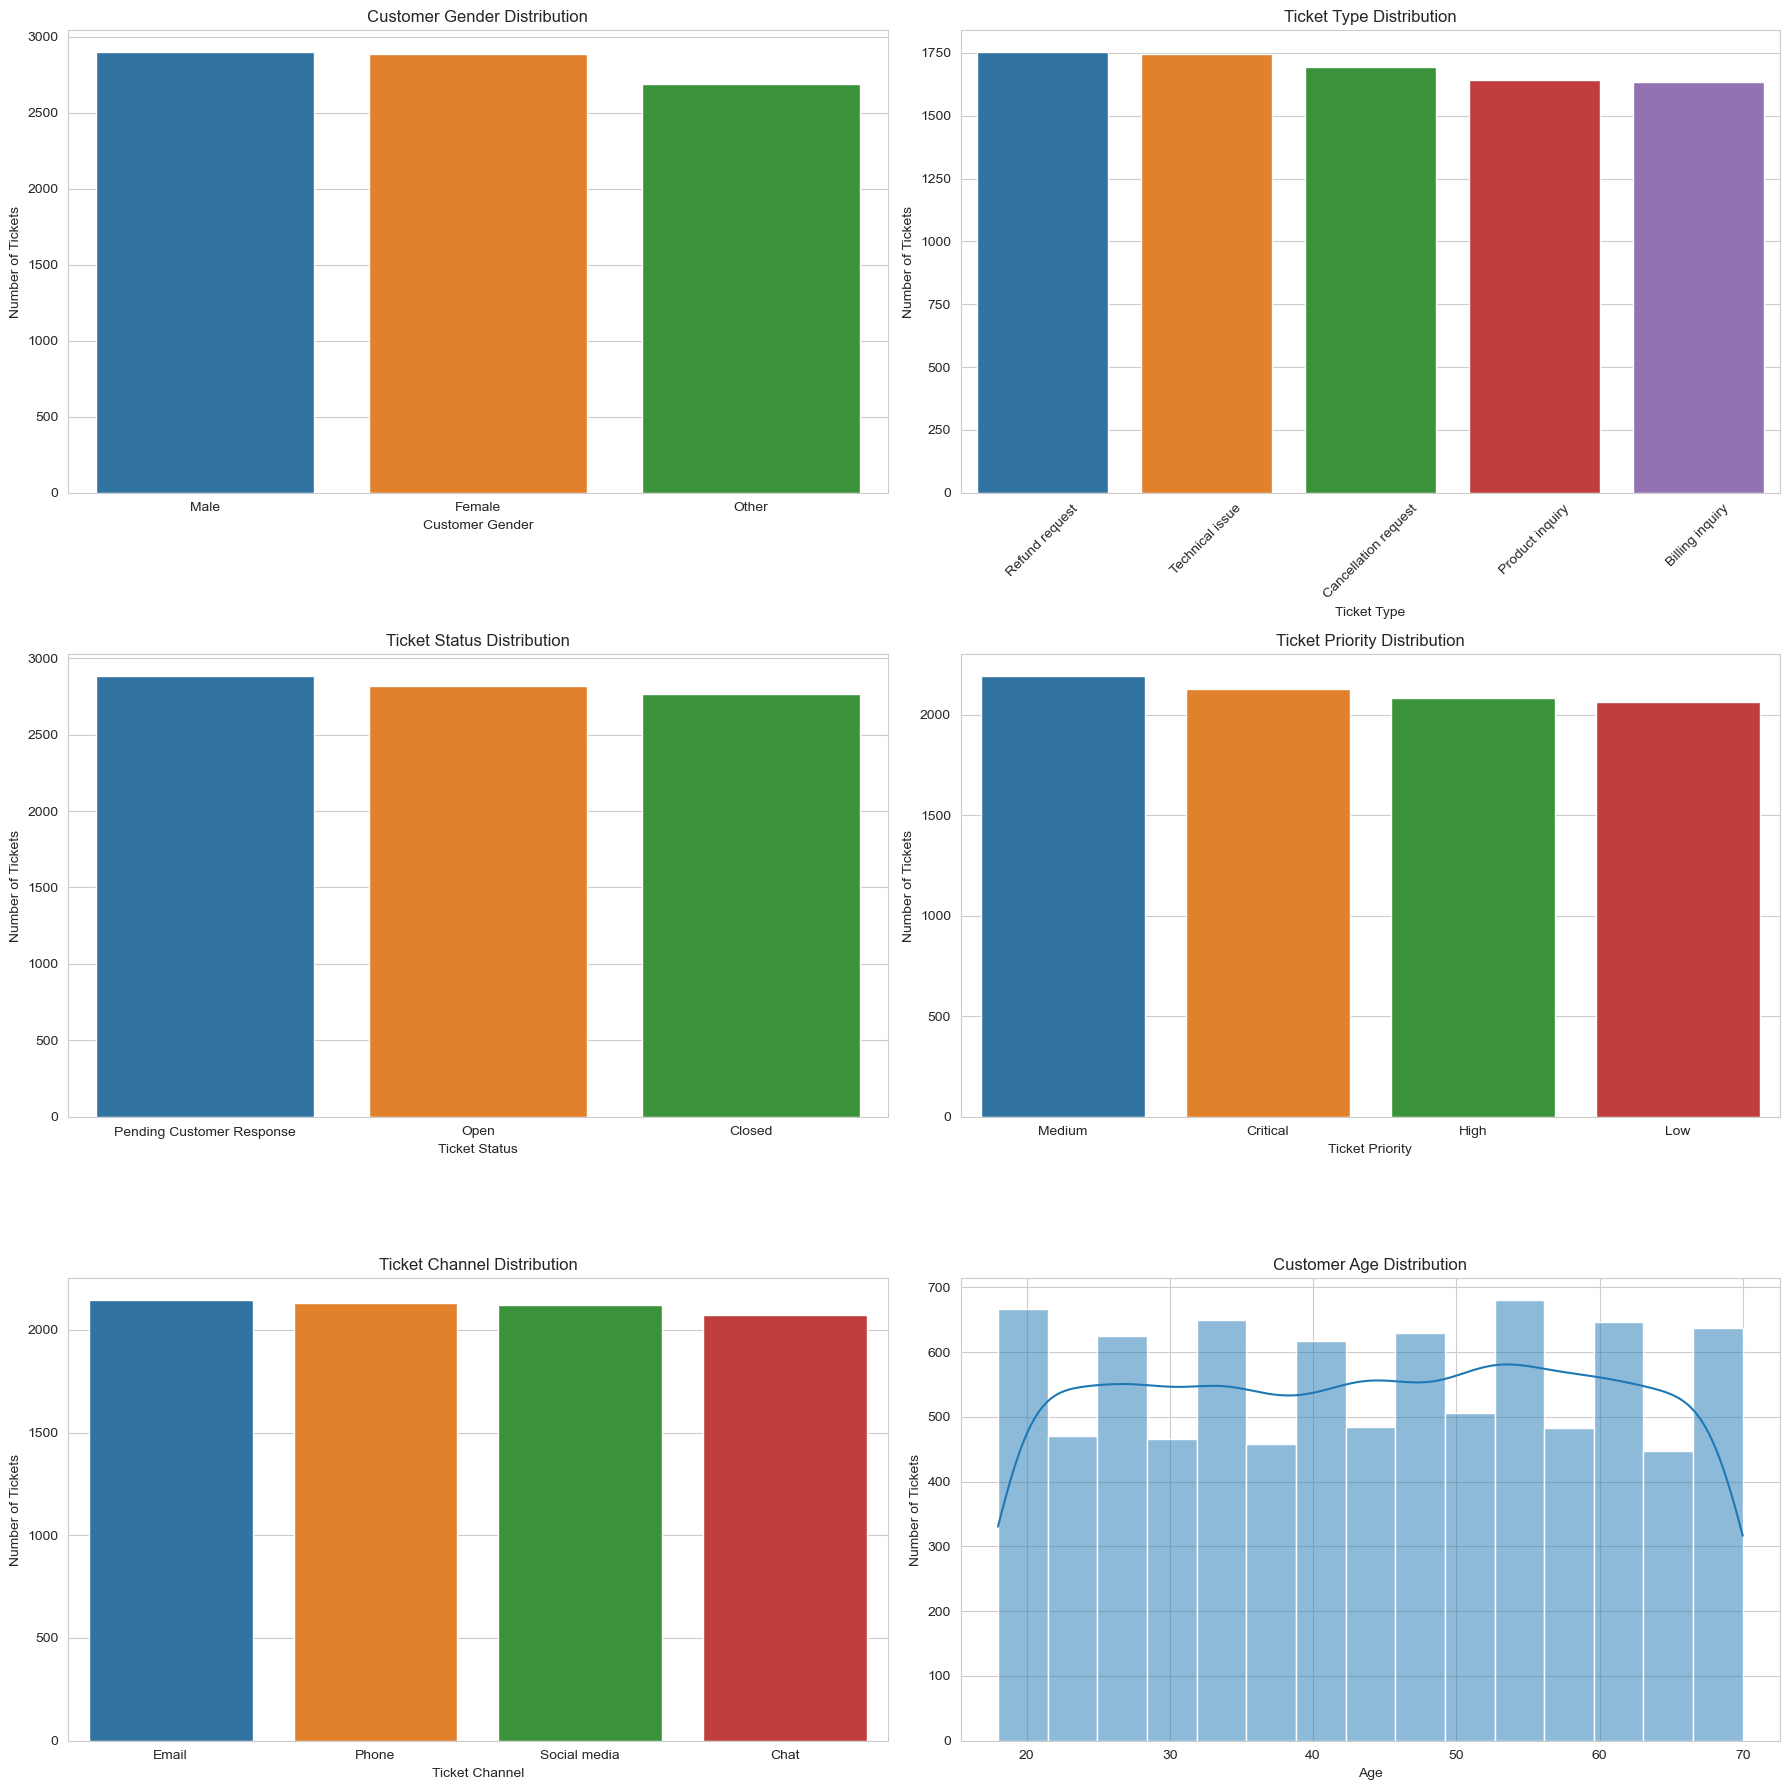

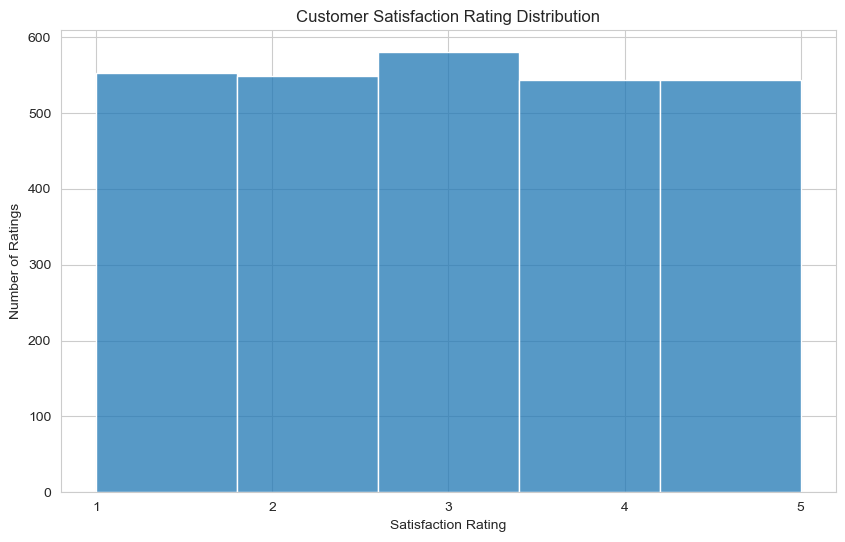

In [33]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare data for plotting
gender_counts = data['Customer Gender'].value_counts()
ticket_type_counts = data['Ticket Type'].value_counts()
ticket_status_counts = data['Ticket Status'].value_counts()
ticket_priority_counts = data['Ticket Priority'].value_counts()
ticket_channel_counts = data['Ticket Channel'].value_counts()
age_distribution = data['Customer Age']
satisfaction_distribution = data['Customer Satisfaction Rating'].dropna()

# Create plots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Plot for Customer Gender distribution
sns.barplot(ax=axes[0, 0], x=gender_counts.index, y=gender_counts.values)
axes[0, 0].set_title('Customer Gender Distribution')
axes[0, 0].set_ylabel('Number of Tickets')

# Plot for Ticket Type distribution
sns.barplot(ax=axes[0, 1], x=ticket_type_counts.index, y=ticket_type_counts.values)
axes[0, 1].set_title('Ticket Type Distribution')
axes[0, 1].set_ylabel('Number of Tickets')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot for Ticket Status distribution
sns.barplot(ax=axes[1, 0], x=ticket_status_counts.index, y=ticket_status_counts.values)
axes[1, 0].set_title('Ticket Status Distribution')
axes[1, 0].set_ylabel('Number of Tickets')

# Plot for Ticket Priority distribution
sns.barplot(ax=axes[1, 1], x=ticket_priority_counts.index, y=ticket_priority_counts.values)
axes[1, 1].set_title('Ticket Priority Distribution')
axes[1, 1].set_ylabel('Number of Tickets')

# Plot for Ticket Channel distribution
sns.barplot(ax=axes[2, 0], x=ticket_channel_counts.index, y=ticket_channel_counts.values)
axes[2, 0].set_title('Ticket Channel Distribution')
axes[2, 0].set_ylabel('Number of Tickets')

# Plot for Customer Age distribution
sns.histplot(ax=axes[2, 1], x=age_distribution, bins=15, kde=True)
axes[2, 1].set_title('Customer Age Distribution')
axes[2, 1].set_xlabel('Age')
axes[2, 1].set_ylabel('Number of Tickets')

plt.tight_layout()
plt.show()

# Plot for Customer Satisfaction Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(satisfaction_distribution, bins=5, kde=False)
plt.title('Customer Satisfaction Rating Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Number of Ratings')
plt.xticks(range(1, 6))
plt.show()


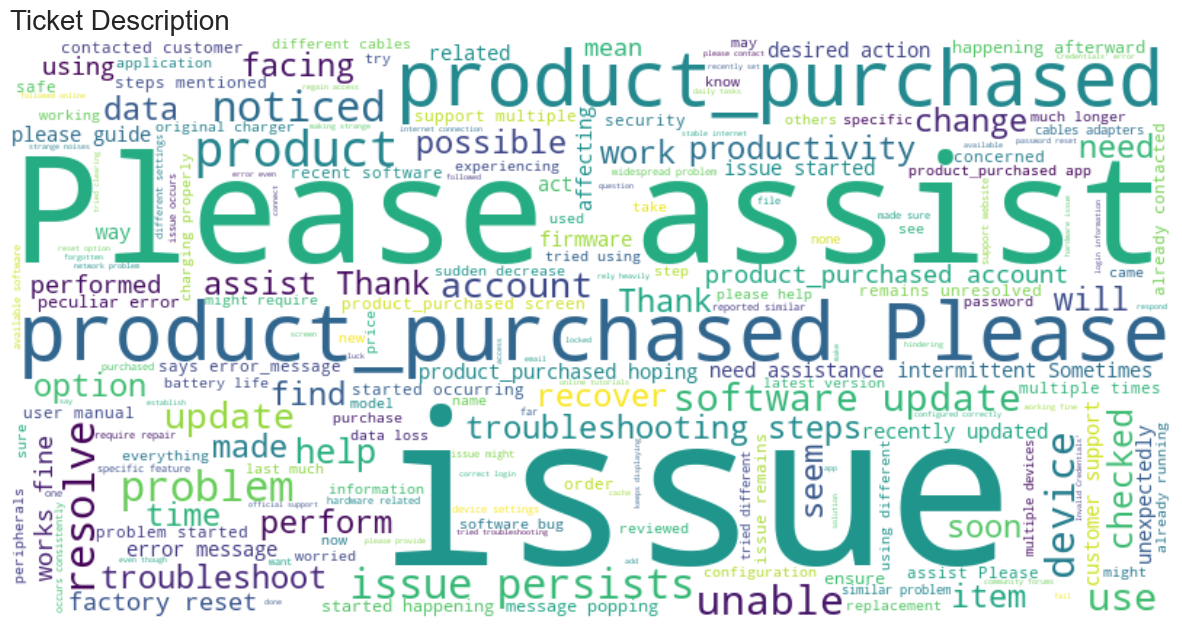

In [34]:
# Combine all Ticket Descriptions into one large text
text = ' '.join(description for description in data['Ticket Description'])

# Define a set of stopwords to be excluded from the word cloud
stopwords = set(STOPWORDS)

# Create the word cloud object, specifying stopwords
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(15, 10))
plt.title('Ticket Description',fontsize = 20,loc='left')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


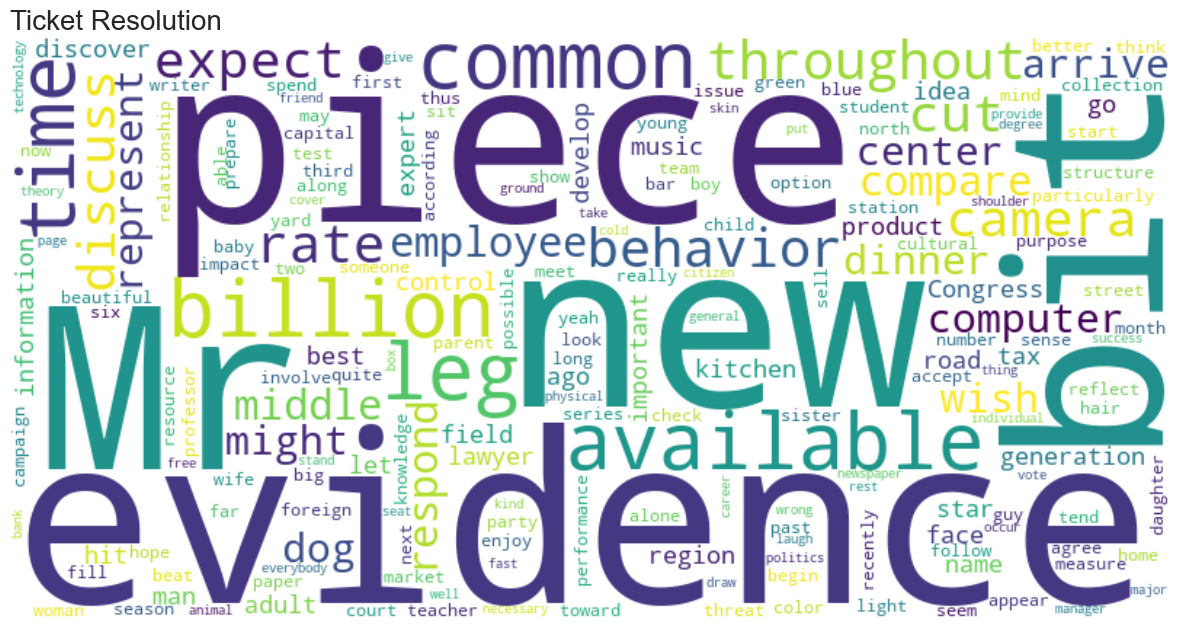

In [25]:
# Combine all Ticket Descriptions into one large text

text = ' '.join(description for description in data['Resolution'].dropna())

# Define a set of stopwords to be excluded from the word cloud
stopwords = set(STOPWORDS)

# Create the word cloud object, specifying stopwords
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(15, 10))
plt.title('Ticket Resolution',fontsize = 20,loc='left')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

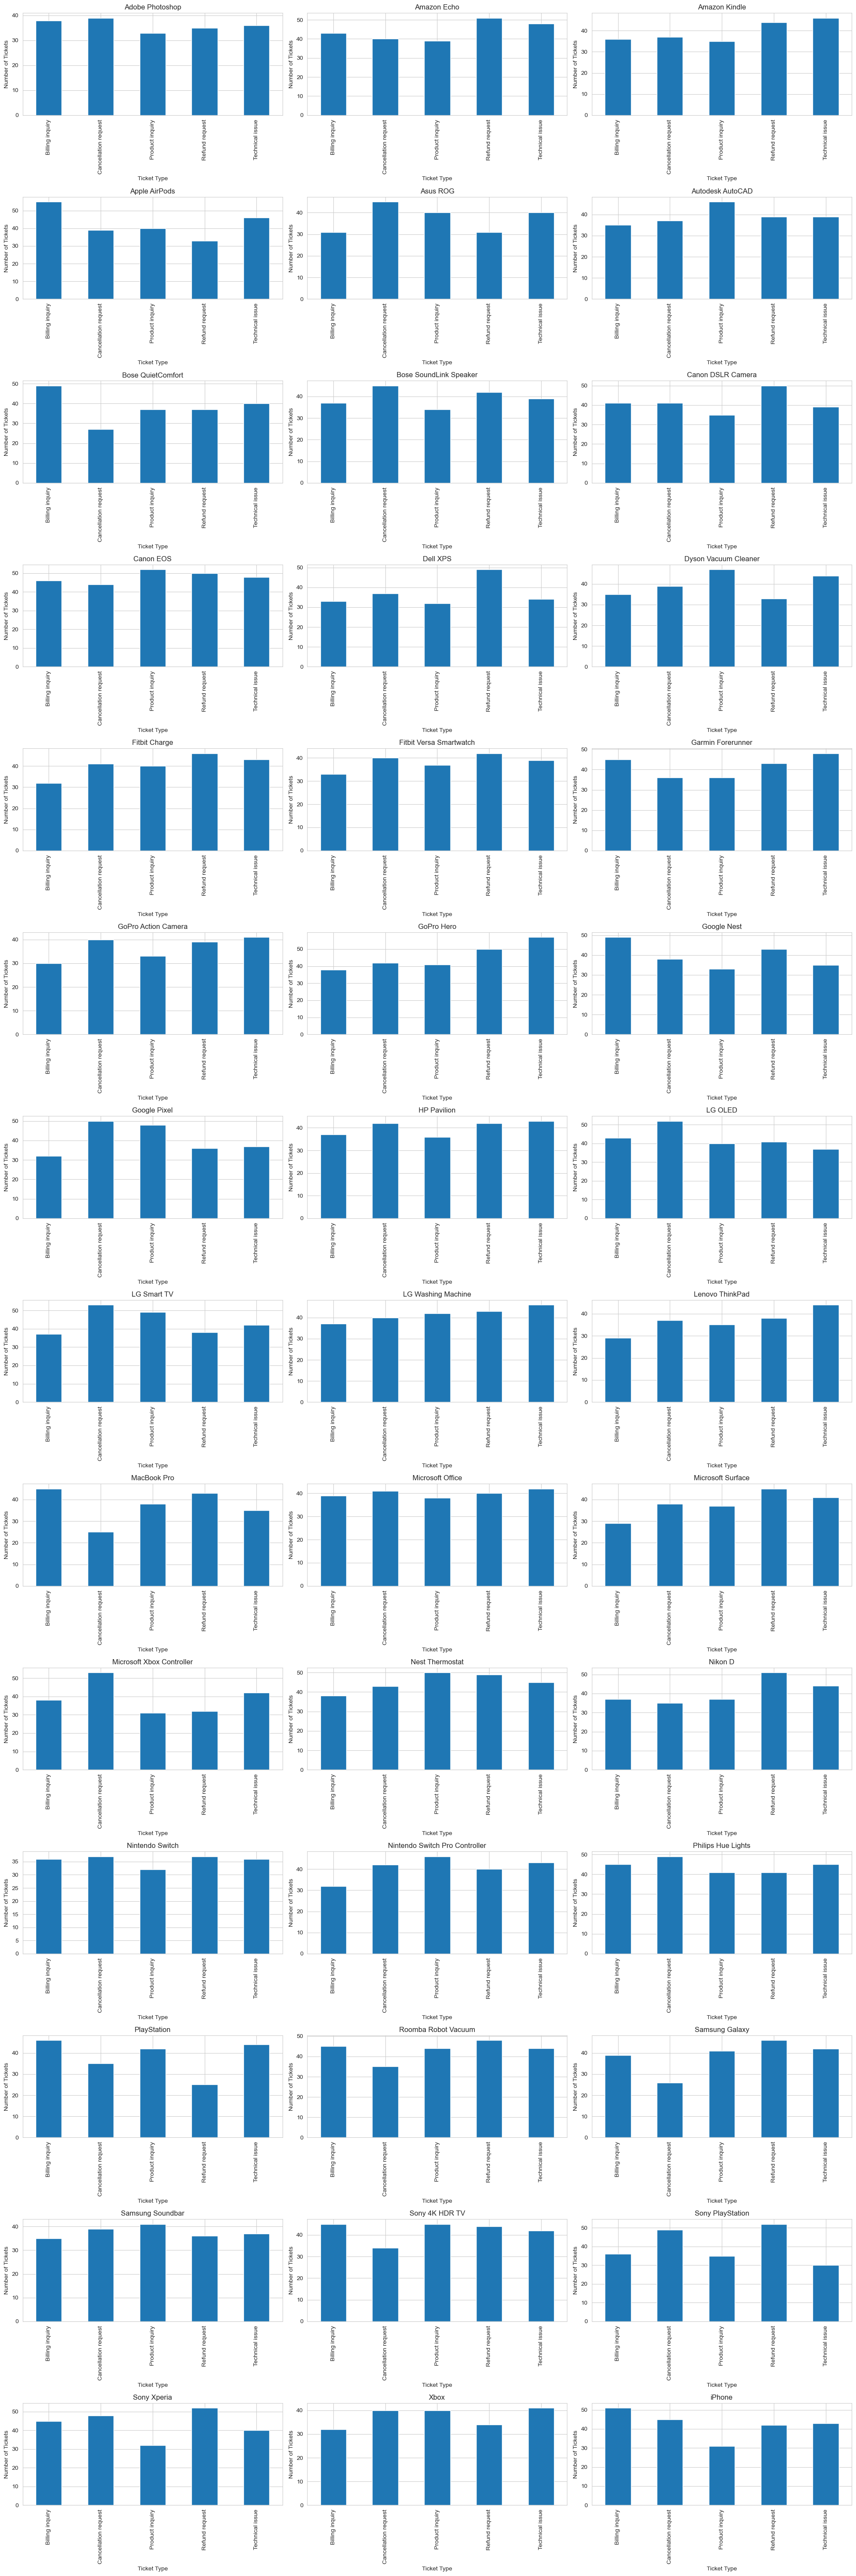

In [29]:
# Preparing the data for plotting: Counting occurrences of Ticket Type for each Product Purchased
issue_type_distribution = data.groupby(['Product Purchased', 'Ticket Type']).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(len(issue_type_distribution) // 3 + (len(issue_type_distribution) % 3 > 0), 3, figsize=(20, 60))

# Flattening axes array for easy iteration
axes = axes.flatten()

for i, (product, counts) in enumerate(issue_type_distribution.iterrows()):
    counts.plot(kind='bar', ax=axes[i], title=product)
    axes[i].set_ylabel('Number of Tickets')
    axes[i].set_xlabel('Ticket Type')

# Hide any unused axes if the number of products is not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()
